In [1]:
library(dplyr)
library(ComplexHeatmap)
library(RColorBrewer)  
library(readxl)


载入程序包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


载入需要的程序包：grid

ComplexHeatmap version 2.22.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [2]:
setwd('~/workspace/Mida_collab/')

In [3]:
mat <- read.csv('CellOracle/exp_df_sample.csv',row.names = 1)

In [4]:
colors <- colorRampPalette(rev(brewer.pal(name = 'RdYlBu', n = 5)))(250)

In [5]:
RGG <- read.csv('CellOracle/gradient_table2.vRG.tsv',sep='\t')  %>% filter(flag == 'Pass')

In [6]:
TF_order <- read_excel('TF_perturbation/TF_heatmap.xlsx',col_names = FALSE)  %>% filter(`...2` %in% RGG$gene)

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`


In [7]:
mat <- mat[,c('Sulcus','Adjacent','Distant')]
mat %>% head()

,Sulcus,Adjacent,Distant
,<dbl>,<dbl>,<dbl>
AL627309.1,0.0018448906,0.0019973794,0.003421418
AL627309.5,0.0090205865,0.0123232410,0.008953187
AL627309.4,0.0000000000,0.0003718964,0.000000000
AL669831.2,0.0000000000,0.0000000000,0.000000000
LINC01409,0.0453312400,0.0541621560,0.046224060
FAM87B,0.0006851223,0.0000000000,0.000000000


In [8]:
TFs <- read.csv('RNA_heatmap/TF_perturbation_Filt.csv',header = FALSE) ###filtered after PS score

In [9]:
all_TFs <- TFs$V1 
all_TFs <- all_TFs[1:length(all_TFs)-1]

In [10]:
RGG %>% filter(gene %in% all_TFs)

gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,Adjacent,Distant,Sulcus,flag,flag_pseudoage,Module
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>
ETV5,3.496681e-219,2.4869767,0.481,0.120,1.080964e-214,Distant,0.24914538,0.52458348,0.10767314,Pass,TRUE,2
FOXP2,2.880133e-162,1.6511994,0.661,0.321,8.903644e-158,Sulcus,0.48979218,0.38995143,0.99077203,Pass,TRUE,4
LEF1,6.462201e-178,2.7638262,0.452,0.093,1.997725e-173,Sulcus,0.25121665,0.08068768,0.47999059,Pass,TRUE,4
MEIS1,0.000000e+00,5.2068979,0.476,0.019,0.000000e+00,Distant,0.08912636,0.52197554,0.01668626,Pass,TRUE,2
NFE2L2,1.333090e-68,1.2605922,0.433,0.231,4.121115e-64,Distant,0.27461218,0.44219586,0.20460170,Pass,TRUE,2
NFIC,5.063594e-82,1.3951212,0.451,0.211,1.565360e-77,Sulcus,0.34943578,0.19484090,0.47382430,Pass,TRUE,4
NFIX,2.911352e-235,1.0773220,0.971,0.828,9.000153e-231,Sulcus,1.19481176,0.89375886,1.44334647,Pass,TRUE,4
POU3F2,1.542492e-123,2.1497240,0.360,0.110,4.768460e-119,Distant,0.13663267,0.35271490,0.09055733,Pass,TRUE,2
POU6F2,6.414080e-211,3.1146185,0.386,0.066,1.982849e-206,Distant,0.16782737,0.45151044,0.06240560,Pass,TRUE,2


In [11]:
TF_mat <- mat[all_TFs,] %>% t() %>% scale() %>% t() ###z-score scale

In [12]:
sample_group <- c('Sulcus','Adjacent','Distant')
sample_cols <- c('#1e807a',  '#f5d731','#d92523') %>% setNames(sample_group)

h1 <- HeatmapAnnotation(
  Region = sample_group,
  col = list(Region = sample_cols),
    height = unit(1,'mm'),
    width = unit(3,'cm')
)

In [13]:
all_TFs <- TF_order$`...2`
all_TFs <- all_TFs[all_TFs %in% rownames(TF_mat)]
TF_mat <- TF_mat[all_TFs,]

In [14]:
TF_mat

,Sulcus,Adjacent,Distant
LEF1,1.0551443,-0.1213666,-0.9337776
NFIC,1.1329698,-0.3733928,-0.7595770
ZNF423,1.0610818,-0.1361059,-0.9249760
FOXP2,1.1543203,-0.6028207,-0.5514996
NFIX,1.1263761,-0.3430569,-0.7833192
RFX4,0.7060523,0.4382498,-1.1443021
POU6F2,-0.9306302,-0.1266694,1.0572995
NFE2L2,-0.9182309,-0.1472170,1.0654479
POU3F2,-0.7596917,-0.3732486,1.1329404
MEIS1,-0.7925275,-0.3310086,1.1235361


In [15]:
TF_heat <- Heatmap(
  TF_mat,
  name = "TFs_Zscore",
    col = colors,
        height = unit(15,'cm'),
    width = unit(3,'cm'),
    column_order = factor(c('Sulcus','Adjacent','Distant'),levels = c('Sulcus','Adjacent','Distant')),
    row_order = rownames(TF_mat),
    cluster_rows = FALSE,
  row_names_gp = gpar(fontsize = 6),
    top_annotation = h1,
    # left_annotation = h2,
  column_names_gp = gpar(fontsize = 8)
)

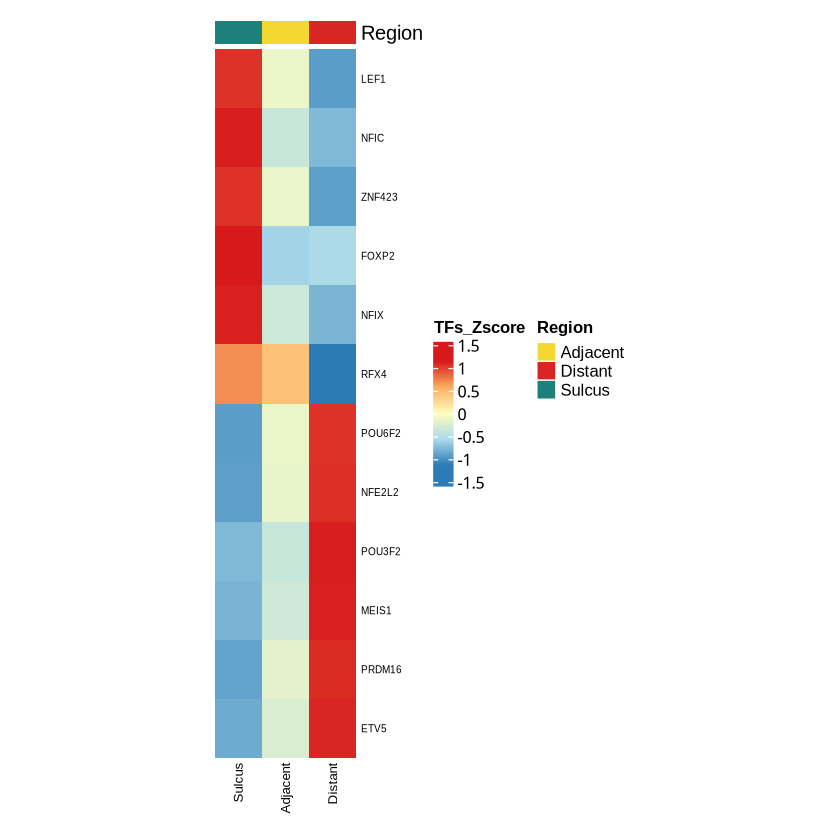

In [16]:
TF_heat

In [17]:
pdf("RNA_heatmap/TFs_heatmap_perturbation_v4.pdf", width = 10, height = 8)
draw(TF_heat)
dev.off()

pdf 
  2

In [18]:
pdf("RNA_heatmap/TFs_0.040.0520_renew.pdf", width = 10, height = 8)
draw(TF_heat)
dev.off()

pdf 
  2

In [19]:
write.csv(data.frame(all_TFs),file='TF_perturbation/all_TFs_perturbation.csv')